# Introductory applied machine learning
# Assignment 4: Unsupervised Learning Part B (PCA) [50%]

<div align="right"><font color="blue" size="5">Your Score was 44.0 out of a total of 61.0, or 72.1%</font></div>

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 4 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 4 and deals with the MNIST Dataset - Part A deals with the 20 Newsgroup dataset. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 22/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. The Jupyter Notebook for Part A, *and*
 1. This Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:
1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 04_A_KMeans.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_A_KMeans.ipynb
    scp -r [FULL PATH TO 04_B_PCA.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_B_PCA.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Both Part A and Part B (this notebook) are each worth 50% of the Total Mark for Assignment 4.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# For Getting the Data
from sklearn.datasets import fetch_20newsgroups, load_digits
from sklearn.feature_extraction.text import TfidfVectorizer

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:

import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.cross_validation import KFold
from utils.plotter import plot_voronoi
from random import sample

Populating the interactive namespace from numpy and matplotlib


/afs/inf.ed.ac.uk/user/s16/s1608480/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/afs/inf.ed.ac.uk/user/s16/s1608480/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Description of the dataset

In this part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance.

### Description of the Data

This MNIST Dataset is a collection of handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Exploration of the dataset

As in part A, we will automatically download the data we will be using. Execute the cell below, which will download the data, and also output a textual description of the dataset, which you should read. The more interested reader may also look at the official [documentation](http://yann.lecun.com/exdb/mnist/) (note that this is a preprocessed version of the original dataset mentioned in that link).

**Do not change any of the code in this cell.**

In [2]:
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 1.1 --- [9 marks] ==========

Let us start by familiarising ourselves with the dataset. Note that digits is a python `dict`: we have already used one of its entries (`DESCR`) to get the description above. If you execute `digits.keys()`, you'll see another 4 fields. We will focus our analysis on the `data` and `target` arrays. Occasionally, it may be useful to refer to the `images` field, which is the same as `data` but reshaped to 8x8 images rather than flattened.

&nbsp;&nbsp;**(a)** [Code] Using suitable pandas/numpy methods, summarise the key properties of the `data` and `target` arrays. This should be no more than a few lines of code. *Hint: you may find it helpful to transform the `data` to a Pandas DataFrame.*<br>
&nbsp;&nbsp;**(b)** [Text] Comment on your observations from ***(a)*** (dimensionality, data ranges, anything out of the ordinary). (<5 sentences)<br>

<div align="right"><font color="blue" size="4">6.0/9.0</font></div>

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

<div align="right"><font color="blue" size="4">0.0</font></div>

In [4]:
# First convert the data key to a dataframe
data = pd.DataFrame(digits['data'])
# And the target key to a series
target = pd.Series(digits['target'])

# Look at the first few instances of each variable
display(data.head(5))
display(target.head(5))

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


0    0
1    1
2    2
3    3
4    4
dtype: int64

In [5]:
# Now we look at the amount of data we have 
print("Number of examples: {}".format(data.shape[0]))

Number of examples: 1797


In [6]:
# Now for some useful information about the set of digits
display(data.info())

# And finally some useful statistics
display(data.describe())
display(target.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
0     1797 non-null float64
1     1797 non-null float64
2     1797 non-null float64
3     1797 non-null float64
4     1797 non-null float64
5     1797 non-null float64
6     1797 non-null float64
7     1797 non-null float64
8     1797 non-null float64
9     1797 non-null float64
10    1797 non-null float64
11    1797 non-null float64
12    1797 non-null float64
13    1797 non-null float64
14    1797 non-null float64
15    1797 non-null float64
16    1797 non-null float64
17    1797 non-null float64
18    1797 non-null float64
19    1797 non-null float64
20    1797 non-null float64
21    1797 non-null float64
22    1797 non-null float64
23    1797 non-null float64
24    1797 non-null float64
25    1797 non-null float64
26    1797 non-null float64
27    1797 non-null float64
28    1797 non-null float64
29    1797 non-null float64
30    1797 non-null float64
31    1797 non-null float

None

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


count    1797.000000
mean        4.490818
std         2.865304
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
dtype: float64

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">you should print the shape of the data and target, the count of the target for each class</font></div>

b)

We see that we have 1797 digits with each being represented as a 64-dimensional row vector with a floating point value for each pixel. These are all stored in the dataframe data we have created. For each row (image) we also have a corresponding floating point value in the target series indicating the digit the image shows. 

Our matrix of images is very sparse as is to be expected since most pixels will be black. Their individual values range from 0-16 and the average pixel value varies across the same wide range even between adjacent pixels. 

The average value of the target series is ~4.5 which is the expected value of a digit chosen from a uniform distribution of all digits. This is an indication that we have a relatively equal distribution across all classes (digits).

<div align="right"><font color="blue" size="4">4.0</font></div>

<div align="left"><font color="green" size="4">describe values in the data</font></div>

### ========== Question 1.2 --- [12 marks] ==========

In order to better interpret the values, we will analyse the standard deviation of the data.

&nbsp;&nbsp;**(a)** [Code] Compute the Standard Deviation over the entire mnist dataset as well as on a per-digit basis. Plot the standard-deviations as 8x8 images (you can use `sns.heatmap()`). *Hint: you may find Pandas' [grouping](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) functionality useful.*<br>
&nbsp;&nbsp;**(b)** [Text] Bearing in mind the way in which PCA reduces dimensionality, comment on the relative importance of the 64 dimensions with respect to PCA dimensionality reduction. (1 sentence)<br>
&nbsp;&nbsp;**(c)** [Text] Does the level of standard deviation indicate whether a dimension is important or not for classification? Explain. (4-5 sentences) *Hint: It may be useful to refer to both the global as well as the per-digit visualisations.*

<div align="right"><font color="blue" size="4">10.0/12.0</font></div>

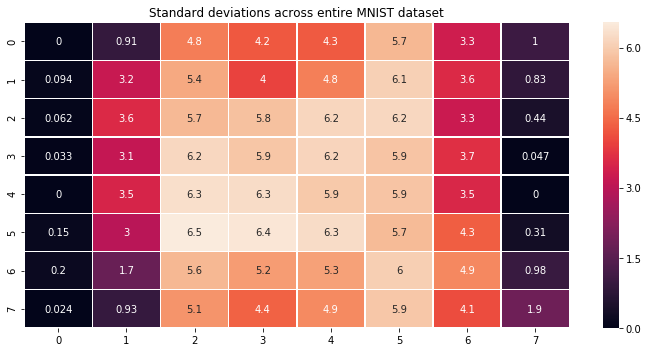

In [7]:
# Stds over entire dataset 
std_entire = data.std().values.reshape((8,8))

plt.figure(figsize=(10,5))
sns.heatmap(std_entire, annot=True, linewidths=0.5)
plt.title("Standard deviations across entire MNIST dataset")

plt.tight_layout()
plt.show()

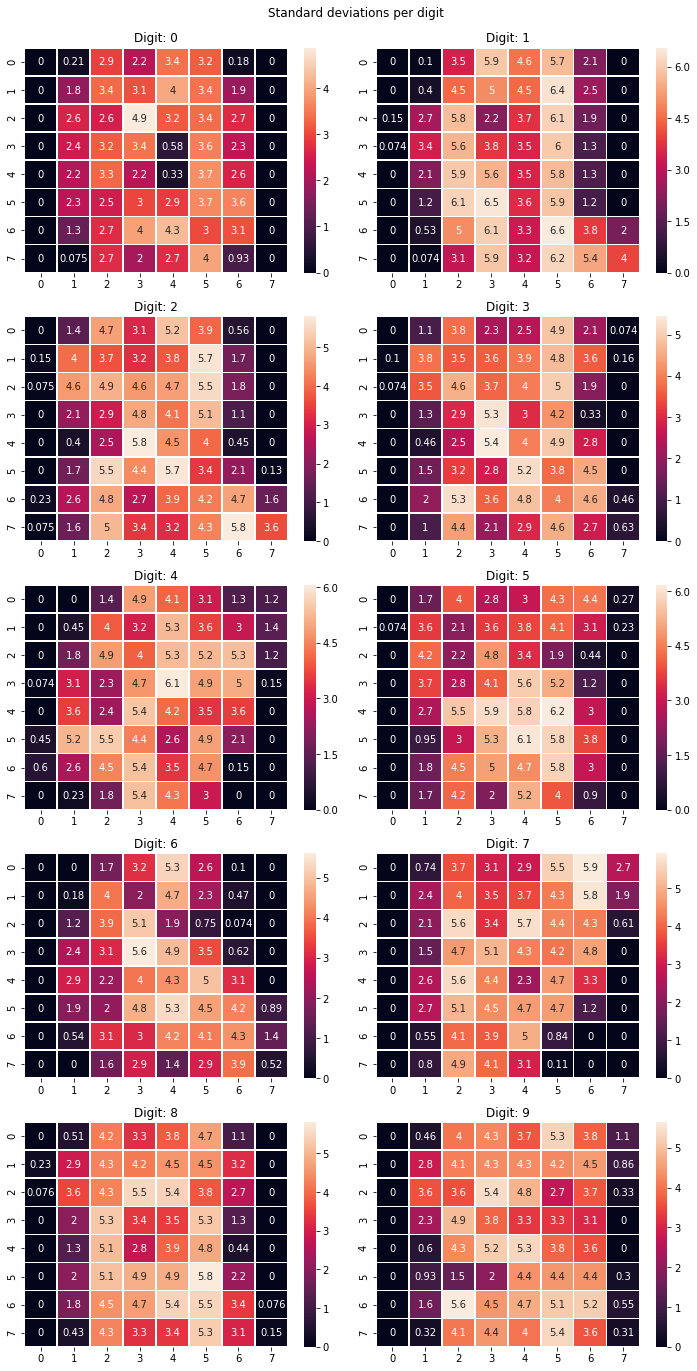

In [8]:
# Per digit basis
digit_stds = data.groupby(target).std().values.reshape((10,8,8))

fig, ax = plt.subplots(5,2,figsize=(10,20))
plt.suptitle("Standard deviations per digit")

for i in range(0,10):
    sns.heatmap(digit_stds[i,:,:], annot=True, linewidths=0.5, ax=ax.flat[i])
    ax.flat[i].set_title("Digit: {}".format(i))

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

<div align="right"><font color="blue" size="4">6.0</font></div>

<div align="left"><font color="green" size="4">Good</font></div>

b)

PCA tries to find a subspace which captures most of the variance (and hence a large standard deviation) of the data. Looking at the heatmaps above we see that the standard deviations per pixel increase for pixels nearer the center of an image, hence these will be the more important dimensions when we carry out PCA.

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">Good</font></div>

c)

A cursory glance at the heatmaps above suggests a correlation between the standard deviation of a dimension and its importance to classification, however in this case it is simply a correlation and nothing more. We would expect pixels nearer the center of an image to have a large standard deviation as the actual drawing of each digit will be in the center of an image, not at its edges. This means that the vast majority of edges of images are dark and hence they have a low standard deviation.

However consider the digit zero. Even though many different handwriting styles can lead to different looking zeros, we would always expect the very central pixels to be black. This is reflected in the heatmap for zero where we see very low standard deviations near the middle of the image. This is a defining characteristic of the digit zero (the fact it is circular in shape) and hence these pixels have high importance in spite of their low standard deviation. We see other instances of similar situations with the digits 9 and 6 for example.

<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">describe how the non-zero(especially those small values) std values and mean values in per-digit classes affects the classification and the performance of the classifier after applying PCA</font></div>

## 2. Dimensionality Reduction

### ========== Question 2.1 --- [16 marks] ==========

Let us visualise the explained variance by the PCA components. Familiarise yourself with the [PCA](http://scikit-learn.org/0.19/modules/generated/sklearn.decomposition.PCA.html) class in SKLearn.

&nbsp;&nbsp;**(a)** [Code] Using SKLearn's `PCA` object, transform the MNIST `data` into orthogonal (PCA) components, retaining **all** dimensions (set `n_components` appropriately). Set `svd_solver='full'` and keep all other parameters at default values. Then plot the *percentage* variance explained by each dimension as a `bar`-graph, in descending order of variance. *Hint: see the `explained_variance_ratio_` attribute of the PCA object.* On the same graph, plot (line) the cumululative explained variance as you add components (again in descending order of variance explained). Indicate the point at which 80% of the variance is explained (e.g. using matplotlib's [`vlines()`](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.vlines.html)): label the number of components at this point (e.g. in the Legend). Make sure to distinguish between the plots and label them appropriately.<br>&nbsp;&nbsp;*Tip: you may need to use [`twinx()`](https://matplotlib.org/2.2.3/gallery/api/two_scales.html#sphx-glr-gallery-api-two-scales-py) to better combine the two plots. Also, for consistency, number components starting from 0.* <br>
&nbsp;&nbsp;**(b)** [Text] By commenting on the shape of the plot, why do you think 80% of the variance seems like a reasonable threshold? *Hint: Think about why we do PCA*. (<3 sentences)<br>
&nbsp;&nbsp;**(c)** [Text] What can you say about the number of components required to explain 80% of the variance? (<4 sentences)

<div align="right"><font color="blue" size="4">12.0/16.0</font></div>

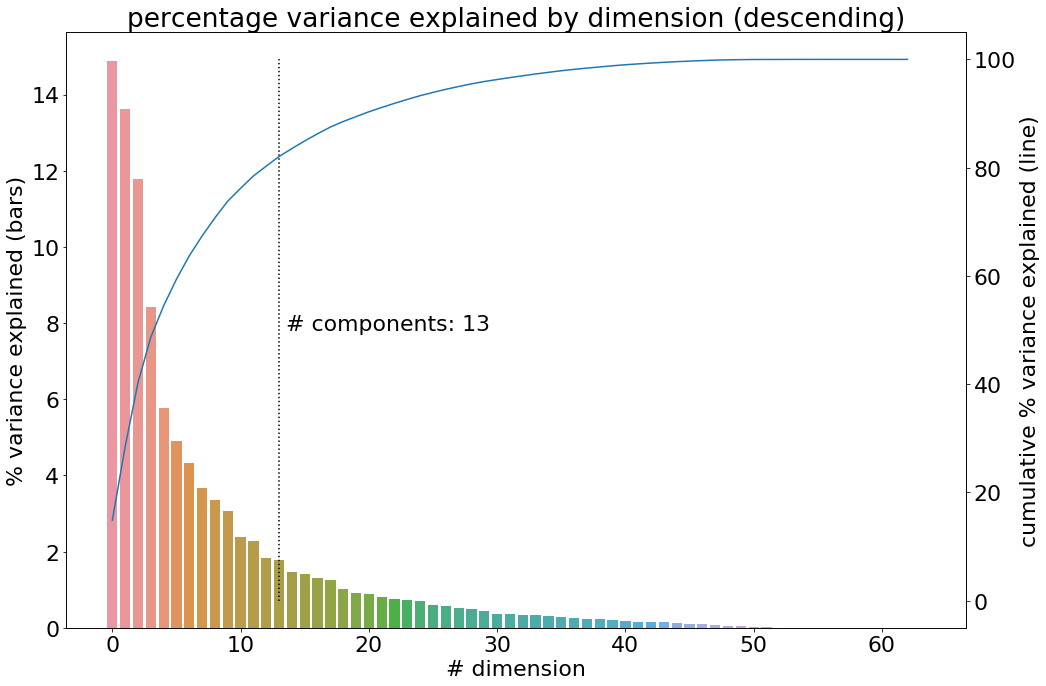

In [12]:
# Fit PCA
pca = PCA(n_components=data.shape[1], svd_solver='full')
pca.fit(data)

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=((15,10)))

# Plot bar graph
sns.barplot(x=np.arange(0,64), y=pca.explained_variance_ratio_*100)
plt.xlabel('# dimension')
plt.ylabel('% variance explained (bars)')

# Plot line on twin axes
ax2 = plt.gca().twinx()
ax2.plot([sum(pca.explained_variance_ratio_[0:i])*100 for i in range(1,64)])

plt.gca().set_xticks(np.arange(0,64,10))
plt.gca().set_xticklabels([0, 10, 20, 30, 40, 50, 60])

# Find 80% point
for i in range (1, 64):
    if (sum(pca.explained_variance_ratio_[0:i]) >= 0.8):
        v_point = i
        break
# Plot 80% point
plt.vlines(v_point, 0, 100, linestyle='dotted')
plt.annotate("# components: {}".format(v_point), xy=(v_point+0.5, 50))

plt.ylabel('cumulative % variance explained (line)')
plt.title('percentage variance explained by dimension (descending)')
plt.tight_layout()
plt.show()

<div align="right"><font color="blue" size="4">9.0</font></div>

<div align="left"><font color="green" size="4">plot the legend of the graph</font></div>

b)

We see that the plot of cumulative % variance explained is concave down. This means its rate of increase decreases the further along the x-axis we go. Once we reach the 80% threshold the rate of increase is very slow and to account for more of the variance we will have to greatly increase the number of components, which defeats the purpose of PCA in the first place. For example if we wanted to account for 90% of the variance we would have to increase the number of components to 21 i.e. a 62% increase in the number of components. This isn't really worth the 10% gain in variance explained.

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">describe the explained variance graph</font></div>

c)

We have discovered that we only need 13 eigenvectors to span a subspace which accounts for 80% of the variance in our data. This is significantly fewer dimensions than the 64 we started with. Even though our input space has 64 dimensions, it suggests our dat actually exists within a much smaller subspace. It suggests that PCA may be effective in reducing the number of dimensions we need to work with.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">mention that 13 components is still larger than the number of classes and explain why</font></div>

### ========== Question 2.2 --- [10 marks] ==========

Let us attempt to visualise the Principal Components.

&nbsp;&nbsp;**(a)** [Code] Use heatmap (set `cmap='binary'`) to visualise the first 3 principal components in the original 8x8 space. Label the plots and chose the intensity range carefully. Also plot the mean value. *Hint: You should have 4 figures. Use the `components_`/`mean_` attributes of the `PCA` object you created.* <br>
&nbsp;&nbsp;**(b)** [Text] By making reference to the above plots, interpret the principal components and the mean. In your discussion (< 5 sentences) you should indicate what in general a principal component shows, how it relates to the original space and how the specific components (and mean) you visualised apply to our data.

<div align="right"><font color="blue" size="4">6.0/10.0</font></div>

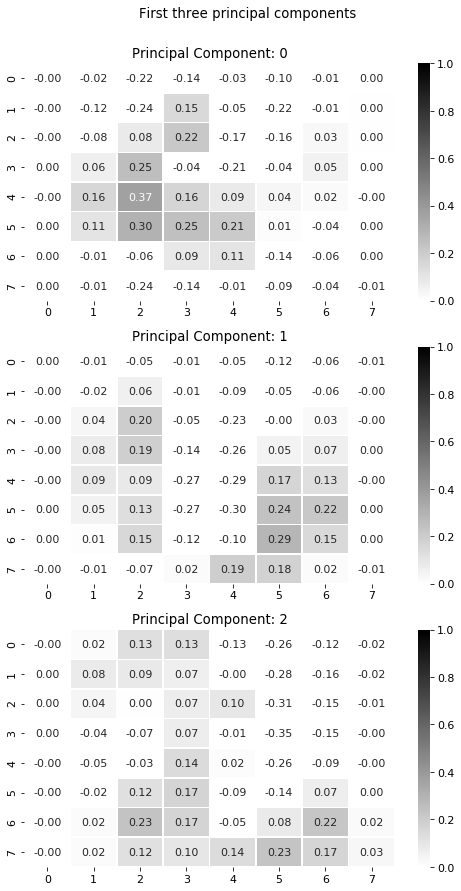

In [13]:
# Plot first three principal componenets
plt.rcParams.update({'font.size': 11})

fig, ax = plt.subplots(3,1,figsize=(7,13))
plt.suptitle("First three principal components")

for i in range(0,3):
    sns.heatmap(pca.components_[i].reshape((8,8)), annot=True, fmt=".2f", linewidths=0.5, ax=ax.flat[i], cmap='binary', vmin=0, vmax=1)
    ax.flat[i].set_title("Principal Component: {}".format(i))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

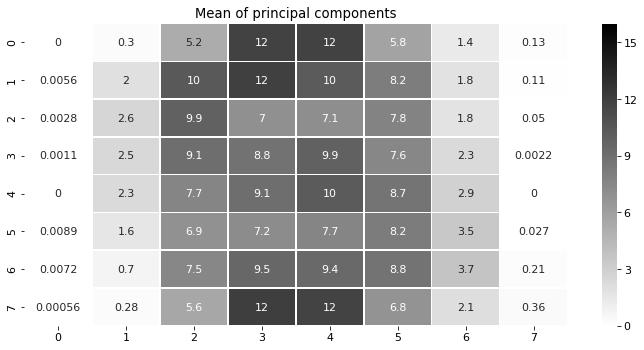

In [14]:
# Plot mean principal component
my_pcamean = pca.mean_.copy()
fig = plt.figure(figsize(10,5))
sns.heatmap(my_pcamean.reshape((8,8)), annot=True, linewidths=0.5, cmap='binary', vmin=0, vmax=16)

plt.title('Mean of principal components')

plt.tight_layout()
plt.show()

<div align="right"><font color="blue" size="4">4.0</font></div>

<div align="left"><font color="green" size="4">Good</font></div>

b)

In general we would expect the principal components to each represent some general feature of the input data. This is because they represent the basis for a subspace which we have transformed the original input space into i.e. we are trying to represent most of the original data in a lower dimension.

In this specific case we have not reduced the dimensionality but instead are finding a basis for our 64 dimensional space. Our principal components will represent general features of a particular digit or a few digits.

Indeed, when looking at the first three principal components we see first has the vague appearance of a corner or curve on the left side, which we might see in images of the digit 4 or 6. Similarly, the second principal component shows us two general blobs which would be common in various digits such as 0. The third component is probably the most obvious, we clearly see the general shape of the digit 2. 

Generalising from this, we would expect the mean of all the principal components to encompass the 'most general' digit. We can clearly see the general shape of the digit 8 which probably includes the most features in common with other digits.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">describe the properties of each principal, mean by referencing from the graph</font></div>

### ========== Question 2.3 --- [14 marks] ==========

We now want to explore what these principal components (eigen-vectors) capture about the data. To do this, we will first project the data onto the PCA space, and then reconstruct it using successively more dimensions (eigen-vectors). To save us time, we will do this for the first image (`digits.data[0,:]`) which should itself be a 0.

&nbsp;&nbsp;**(a)** [Code] Let us first verify that PCA is indeed an invertible transform. Using heatmaps similarly to the previous question, display the original digit. Using the PCA object's `transform` method, project this into the PCA space, and then reconstruct the original digit by multiplying each dimension with the projection value. Show the reconstructed digit, and also print the Mean Absolute Differences (MAD) between the two. *Tip: the MAD should be 0 - if it is not, you may be forgetting to add something...* Label everything appropriately.<br>
&nbsp;&nbsp;&nbsp;*Hint: the PCA `transform` requires a 2D array, with the samples along the rows...*<br>
&nbsp;&nbsp;**(b)** [Code] Now we can analyse the quality of the reconstruction as we include more components. For the same digit, plot the reconstruction with `[0, 1, 2, 5, 15, 30]` components. For each reconstruction, compute and print (within the plot title) the MAD between the reconstruction and the original value.<br>
&nbsp;&nbsp;**(c)** [Text] Comment on the observations in the figures. How many components does it take to reconstruct the digit in a way that it is recogniseable?

<div align="right"><font color="blue" size="4">10.0/14.0</font></div>

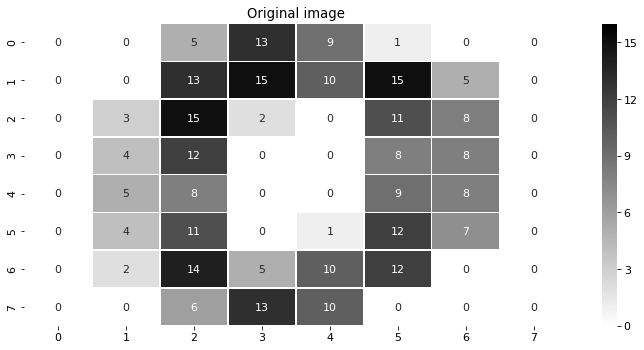

In [15]:
# Display the original digit
fig = plt.figure(figsize(10,5))
sns.heatmap(digits.data[0,:].reshape((8,8)), annot=True, linewidths=0.5, cmap='binary', vmin=0, vmax=16)

plt.title('Original image')

plt.tight_layout()
plt.show()

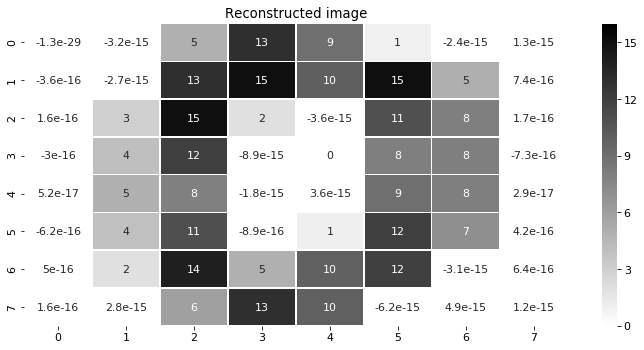

In [16]:
# Display the reconstructed image
coefficients = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()

rec_image = pca.mean_.copy()
rec_image += np.dot(coefficients, pca.components_)

fig = plt.figure(figsize(10,5))
sns.heatmap(rec_image.reshape((8,8)), annot=True, linewidths=0.5, cmap='binary', vmin=0, vmax=16)

plt.title('Reconstructed image')

plt.tight_layout()
plt.show()

In [17]:
# Find MAD
print("Mean absolute difference between original and reconstructed image: {:.3f}".format((np.abs(rec_image)-np.abs(digits.data[0,:])).mean()))

Mean absolute difference between original and reconstructed image: 0.000


<div align="right"><font color="blue" size="4">6.0</font></div>

<div align="left"><font color="green" size="4">set to be square</font></div>

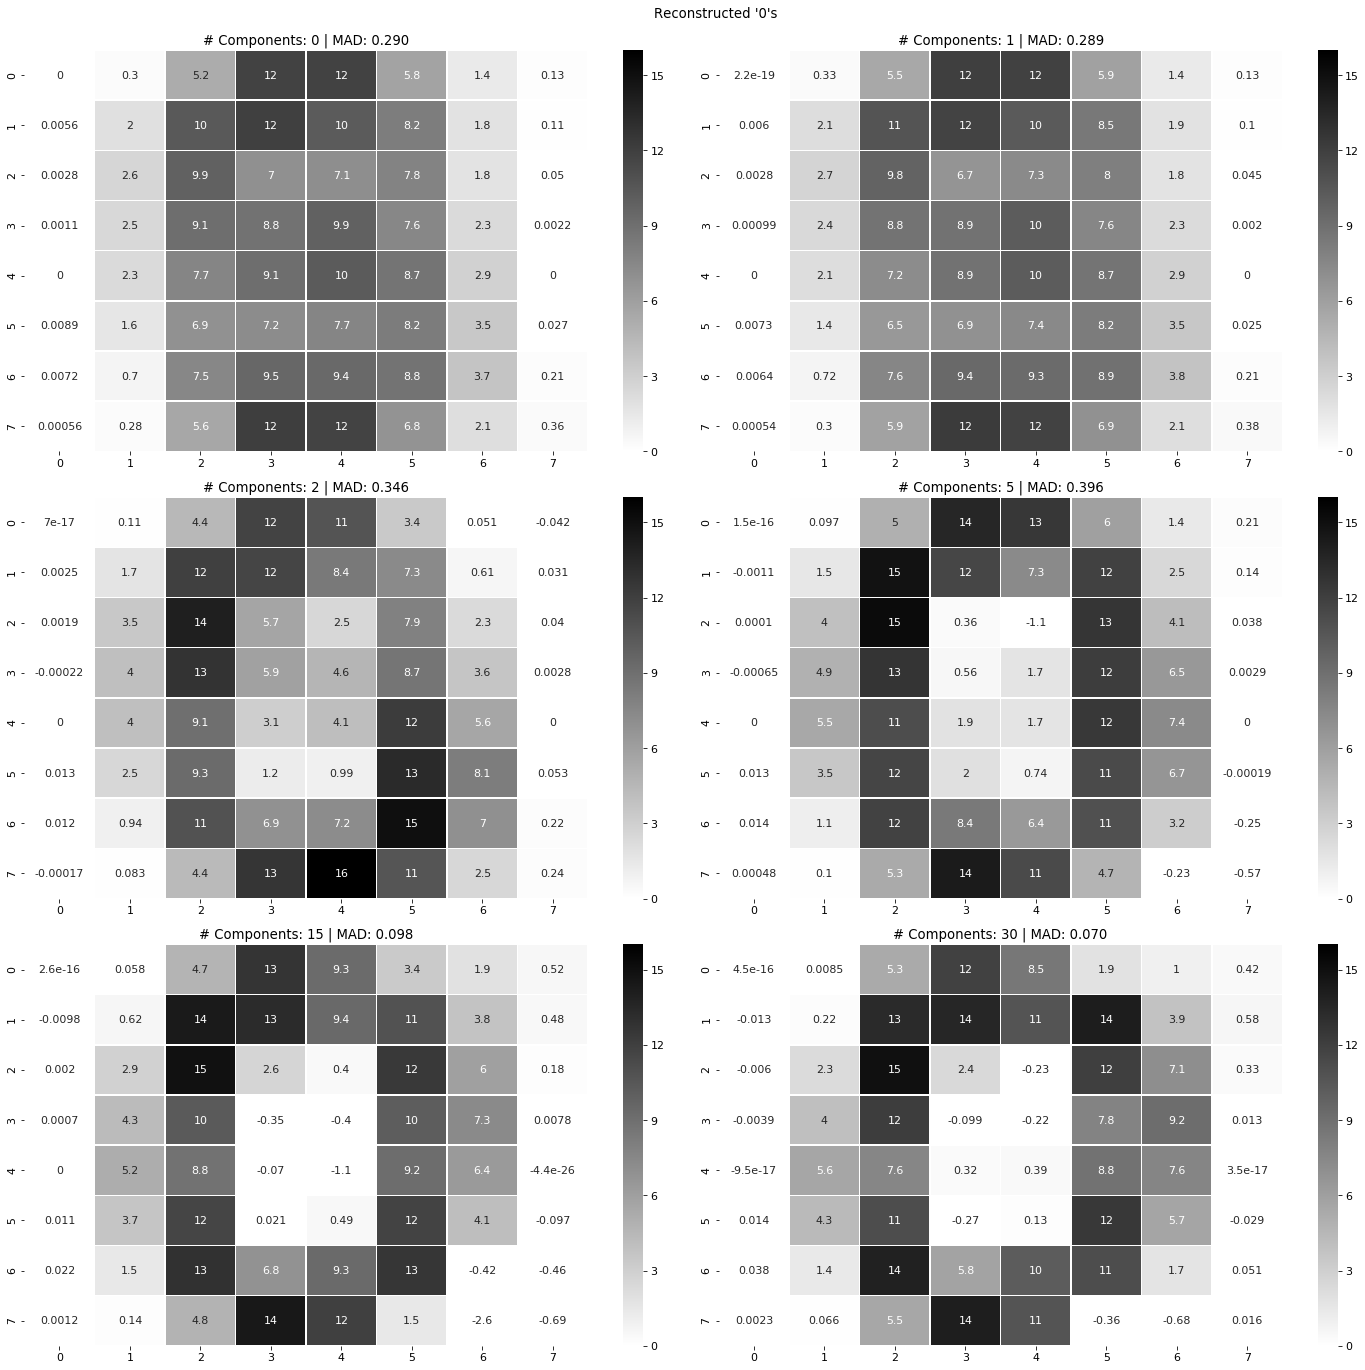

In [18]:
comps = [0,1,2,5,15,30]

fig, ax = plt.subplots(3,2,figsize=(20,20))
plt.suptitle("Reconstructed '0's")

for i in range(0,len(comps)):
    rec_image_ = pca.mean_.copy()
    for j in range (0,comps[i]):
        rec_image_ += np.dot(coefficients[j], pca.components_[j])
    sns.heatmap(rec_image_.reshape((8,8)), ax=ax.flat[i], annot=True, linewidths=0.5, cmap='binary', vmin=0, vmax=16)
    ax.flat[i].set_title("# Components: {} | MAD: {:.3f}".format(comps[i], (np.abs(rec_image_)-np.abs(digits.data[0,:])).mean()))

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">MAD values wrong</font></div>

c)

The lowest number of components after which our image even begins to look like a zero is 5, when we can begin to see the circular shape and clear gap in the centre. However we can see from the original image that this particular zero is slanted slightly, and we only get an indication of this really with 30 components.

It is interesting to see that the MAD actually increases slightly from 0 and 1 component to 2 and 5, however as we continue to increase the number of components it quickly begins to approach zero which we want. A possible explanation for this is that we initially are very close to the mean and adding between 2 and 5 components takes us further away from it, yet still not close enough to the original image. Hence we are actually slightly more different to the original digit until we begin to see a representation that is more similar to the original one.

It should also be noted that some of the values we get for pixels are below zero, and our domain is striclty non-negative, so these reconstructions are not actually realistic.

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">describe and explain why the mad increases from 0 component to 1 component and 5 components to recognise</font></div>

### ========== Question 2.4 --- (LEVEL 11) --- [18 marks] ==========

We will now investigate the effect PCA has on classification performance. Specifically we want to analyse whether the PCA transformation improves the performance of (i) an SVM and (ii) a Naive-Bayes classifier. We will use **5-Fold Cross-Validation** to evaluate our models using the mean accuracy provided by the `score` method of the classifiers in SKLearn. 

*N.B.: To ensure repeatability, set the `random_state=0` where applicable, and use the same KFold object (`shuffle=True`) throughout.*

&nbsp;&nbsp;**(a)** [Code] Train an SVM classifier ([`SVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.SVC.html)) with a linear kernel (keep all other parameters at defaults), first on the raw digit data, and then on the PCA-transformed data, **keeping all components**. Report the mean accuracy over folds in each case.<br>
&nbsp;&nbsp;**(b)** [Code] Now train a `NaiveBayes` classifier with default parameters in a similar manner (on raw and PCA-transformed data). Think carefully, and explain using programming comments, about which type of `NaiveBayes` implementation is applicable in this scenario, keeping in mind that we should use the same type for the Raw and PCA training. Again report the fold-averaged accuracy `score`.<br>
&nbsp;&nbsp;**(c)** [Text] What effect did PCA have on each of these classifiers? By referring to the theory behind each classifier type, explain why this is.

In [16]:
#(a) # Your Code goes here:

In [17]:
#(b) # Your Code goes here:

(c) ***Your answer goes here:***